## Compare *u*-band data <br>
Run SOM on same dataset, one with and one without u-band data
___

In [1]:
from astropy.io import fits
from astropy.table import Table, hstack

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Georgia',
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix',
    'axes.linewidth': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

In [2]:
#Load in KiDS data
with fits.open('/data2/lsajkov/mpdg/data_products/KiDS/KiDS_SOM_catalog_15Jul24.fits') as cat:
    KiDS_cat = Table(cat[1].data)

#Load in GAMA data
with fits.open('/data2/lsajkov/mpdg/data_products/GAMA/GAMA_SOM_training_catalog_15Jul24.fits') as cat:
    GAMA_cat = Table(cat[1].data)

In [3]:
#Select the needed data
KiDS_mag_cut = KiDS_cat['r_mag'] < 20.5
KiDS_redshift_cut = KiDS_cat['redshift'] < 0.1
KiDS_size_cut = KiDS_cat['half_light_radius'] < 5

input_cat = KiDS_cat[KiDS_redshift_cut &\
                     KiDS_mag_cut &\
                     KiDS_size_cut]

GAMA_redshift_cut = GAMA_cat['redshift'] < 0.1
labels_cat = GAMA_cat[GAMA_redshift_cut]


input_data_u = Table([
                    2 * (input_cat['r_mag'] - input_cat['r_mag'].min())/(input_cat['r_mag'].max() - input_cat['r_mag'].min()) - 1,
                    (input_cat['ug_col'] - input_cat['ug_col'].mean())/input_cat['ug_col'].std(),
                    (input_cat['gr_col'] - input_cat['gr_col'].mean())/input_cat['gr_col'].std(),
                    (input_cat['ri_col'] - input_cat['ri_col'].mean())/input_cat['ri_col'].std(),
                ],
            names = [
                     'r_mag',
                     'ug_col',
                     'gr_col',
                     'ri_col',
                     ])

input_stds_u = Table([
                    2 * input_cat['r_mag_err']/(input_cat['r_mag'].max() - input_cat['r_mag'].min()),
                    input_cat['ug_col_err']/input_cat['ug_col'].std(),
                    input_cat['gr_col_err']/input_cat['gr_col'].std(),
                    input_cat['ri_col_err']/input_cat['ri_col'].std(),
                ],
           names = [
                    'r_mag_err',
                    'ug_col_err',
                    'gr_col_err',
                    'ri_col_err',
                ])

input_labels_u = Table([
                      2 * (labels_cat['r_mag'] - labels_cat['r_mag'].min())/(labels_cat['r_mag'].max() - labels_cat['r_mag'].min()) - 1,
                      (labels_cat['ug_col'] - labels_cat['ug_col'].mean())/labels_cat['ug_col'].std(),
                      (labels_cat['gr_col'] - labels_cat['gr_col'].mean())/labels_cat['gr_col'].std(),
                      (labels_cat['ri_col'] - labels_cat['ri_col'].mean())/labels_cat['ri_col'].std(),
                      np.log10(labels_cat['mstar']),
                      labels_cat['redshift']],
             names = [
                      'r_mag',
                      'ug_col',
                      'gr_col',
                      'ri_col',
                      'log_mstar',
                      'redshift'])

input_label_stds_u = Table([
                          2 * labels_cat['r_mag_err']/(labels_cat['r_mag'].max() - labels_cat['r_mag'].min()),
                          labels_cat['ug_col_err']/labels_cat['ug_col'].std(),
                          labels_cat['gr_col_err']/labels_cat['gr_col'].std(),
                          labels_cat['ri_col_err']/labels_cat['ri_col'].std(),
                          labels_cat['mstar_err']/(labels_cat['mstar'] * np.log(10)),
                          np.abs(labels_cat['ppp'] - 0.5) + 0.01],
                 names = [
                          'r_mag_err',
                          'ug_col_err',
                          'gr_col_err',
                          'ri_col_err',
                          'log_mstar_err',
                          'redshift_err'])

input_data_no_u = Table([
                    2 * (input_cat['r_mag'] - input_cat['r_mag'].min())/(input_cat['r_mag'].max() - input_cat['r_mag'].min()) - 1,
                    (input_cat['gr_col'] - input_cat['gr_col'].mean())/input_cat['gr_col'].std(),
                    (input_cat['ri_col'] - input_cat['ri_col'].mean())/input_cat['ri_col'].std(),
                ],
            names = [
                     'r_mag',
                     'gr_col',
                     'ri_col',
                     ])

input_stds_no_u = Table([
                    2 * input_cat['r_mag_err']/(input_cat['r_mag'].max() - input_cat['r_mag'].min()),
                    input_cat['gr_col_err']/input_cat['gr_col'].std(),
                    input_cat['ri_col_err']/input_cat['ri_col'].std(),
                ],
           names = [
                    'r_mag_err',
                    'gr_col_err',
                    'ri_col_err',
                ])

input_labels_no_u = Table([
                      2 * (labels_cat['r_mag'] - labels_cat['r_mag'].min())/(labels_cat['r_mag'].max() - labels_cat['r_mag'].min()) - 1,
                      (labels_cat['gr_col'] - labels_cat['gr_col'].mean())/labels_cat['gr_col'].std(),
                      (labels_cat['ri_col'] - labels_cat['ri_col'].mean())/labels_cat['ri_col'].std(),
                      np.log10(labels_cat['mstar']),
                      labels_cat['redshift']],
             names = [
                      'r_mag',
                      'gr_col',
                      'ri_col',
                      'log_mstar',
                      'redshift'])

input_label_stds_no_u = Table([
                          2 * labels_cat['r_mag_err']/(labels_cat['r_mag'].max() - labels_cat['r_mag'].min()),
                          labels_cat['gr_col_err']/labels_cat['gr_col'].std(),
                          labels_cat['ri_col_err']/labels_cat['ri_col'].std(),
                          labels_cat['mstar_err']/(labels_cat['mstar'] * np.log(10)),
                          np.abs(labels_cat['ppp'] - 0.5) + 0.01],
                 names = [
                          'r_mag_err',
                          'gr_col_err',
                          'ri_col_err',
                          'log_mstar_err',
                          'redshift_err'])


print(f'Len of input data: {len(input_data_u)}')
print(f'Len of labeling data: {len(input_labels_u)}')

Len of input data: 112635
Len of labeling data: 15479


In [4]:
from mpdg_som import SelfOrganizingMap

#Set parameters
name = 'mass_profile_dwarf_galaxies' #name of the SOM

mapsize   = [25, 25] #size of the map. pass as a list of dimensions OR as an integer (also pass number of dimensions)
dimension = None

initialization         = 'pca' #random or pca (principal component analysis)
termination            = 'either' #when to stop learning. maximum_steps = stop when maximum_steps have elapsed. error_thresh = stop when the error is below this threshold. either = stop when either condition is fulfilled
learning_rate_function = 'power_law' #which learning rate function to use. currently implemented: power_law
neighborhood_function  = 'gaussian' #which neighborhood function to use. currently implemented: gaussian
error_estimator        = 'quantization_error' #which error estimation function to use. currently implemented: max_misalignment

learning_rate = 0.64 #used to adjust the learning rate function
kernel_spread = 3.35 #used to adjust the neighborhood function
maximum_steps = 20 #used to adjust the learning rate and neighborhood functions
error_thresh  = 0.05 #used to stop the SOM if termination = 'error thresh'

In [5]:
#Declare the SOM
SOM_u = SelfOrganizingMap(
    name                   = 'with_u_band',
    mapsize                = mapsize,
    dimension              = dimension,
    initialization         = initialization,
    termination            = termination,
    learning_rate_function = learning_rate_function,
    neighborhood_function  = neighborhood_function,
    error_estimator        = error_estimator,
    learning_rate          = learning_rate,
    kernel_spread          = kernel_spread,
    maximum_steps          = maximum_steps,
    error_thresh           = error_thresh
)

#Declare the SOM
SOM_no_u = SelfOrganizingMap(
    name                   = 'no_u_band',
    mapsize                = mapsize,
    dimension              = dimension,
    initialization         = initialization,
    termination            = termination,
    learning_rate_function = learning_rate_function,
    neighborhood_function  = neighborhood_function,
    error_estimator        = error_estimator,
    learning_rate          = learning_rate,
    kernel_spread          = kernel_spread,
    maximum_steps          = maximum_steps,
    error_thresh           = error_thresh
)

In [6]:
data_cut = -1 #use up to this much of the data (-1 for entire dataset)
if data_cut != -1:
    randomized_idx = np.arange(0, len(input_data_u))
    np.random.shuffle(randomized_idx)
    randomized_data_idx  = randomized_idx[:data_cut]
    randomized_label_idx = randomized_idx[data_cut:]

SOM_u.load_data(input_data_u[:data_cut],
              variable_names = [
                                'r_mag',
                                'ug_col',
                                'gr_col',
                                'ri_col',
                                ])

SOM_u.load_standard_deviations(input_stds_u[:data_cut])

SOM_no_u.load_data(input_data_no_u[:data_cut],
              variable_names = [
                                'r_mag',
                                'gr_col',
                                'ri_col',
                                ])

SOM_no_u.load_standard_deviations(input_stds_no_u[:data_cut])

SOM_u.data_statistics()

SOM_no_u.data_statistics()

| Data statistics 
total entries: 112634

stat	r_mag	ug_col	gr_col	ri_col	
min	-1.000	-6.238	-8.573	-12.783	
max	1.000	3.973	2.045	16.003	
mean	0.065	-0.000	0.000	0.000	
median	0.097	-0.064	0.048	0.025	
std	0.570	1.000	1.000	1.000	| Data statistics 
total entries: 112634

stat	r_mag	gr_col	ri_col	
min	-1.000	-8.573	-12.783	
max	1.000	2.045	16.003	
mean	0.065	0.000	0.000	
median	0.097	0.048	0.025	
std	0.570	1.000	1.000	

In [7]:
#Initialize the SOM
SOM_u.build_SOM()

SOM_no_u.build_SOM()


| SOM. Step 0. Initialization: pca
| Initial rms error: 12.755

| SOM. Step 0. Initialization: pca
| Initial rms error: 12.309


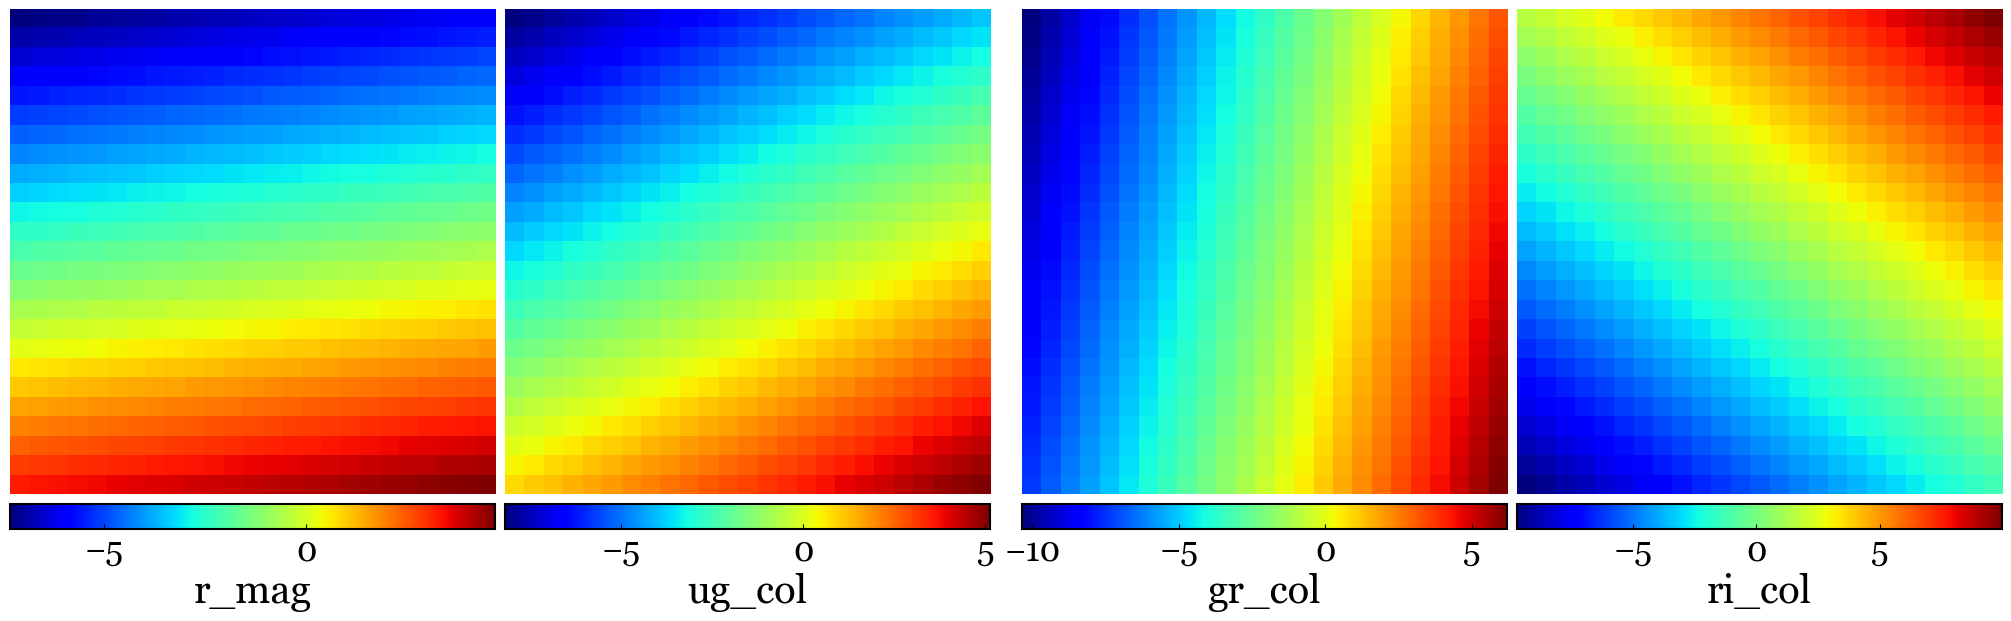

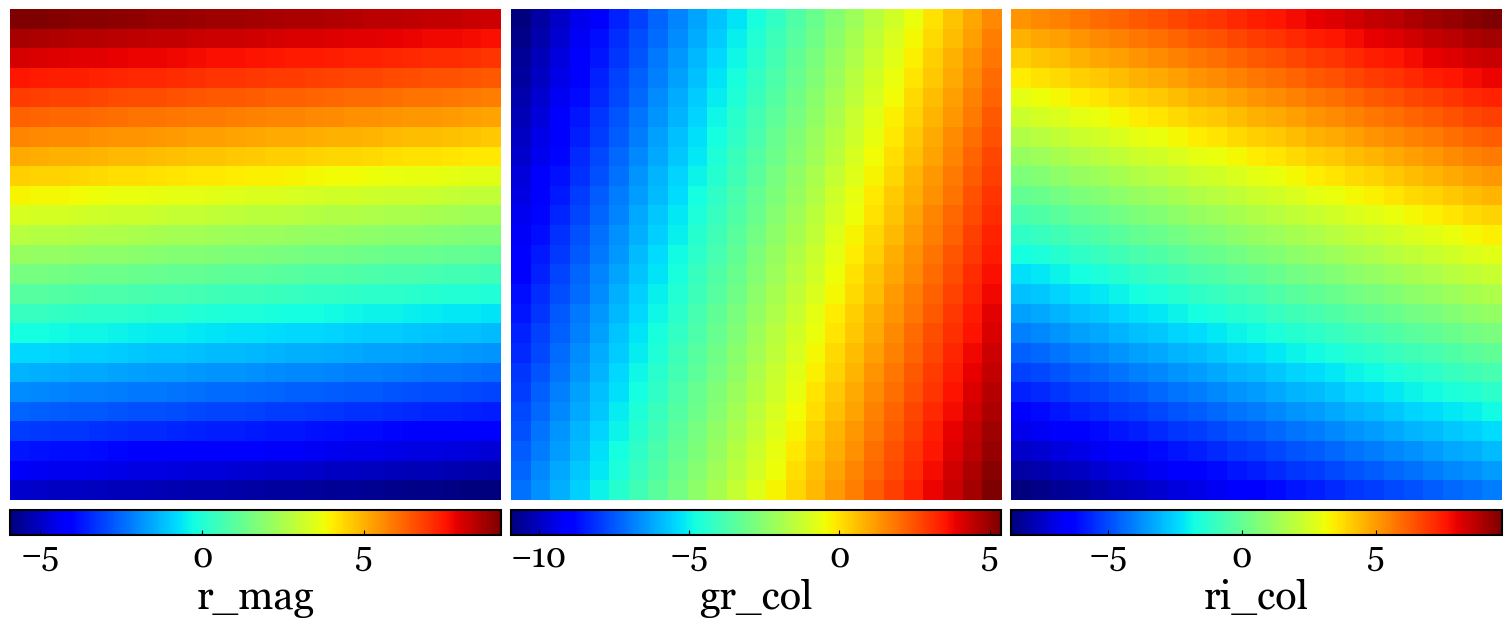

In [8]:
#Visualize SOM before training
SOM_u.show_map(cmap = 'jet')

#Look at initial quantization error
from mpdg_som_utils import SOM_ErrorEstimators

initial_quant_error = SOM_ErrorEstimators.quantization_error(SOM_u.weights_map,
                                                             SOM_u.data,
                                                             SOM_u.bmu_indices)
print(f'| Initial rms error: {initial_quant_error:.3f}')

#Visualize SOM before training
SOM_no_u.show_map(cmap = 'jet')

#Look at initial quantization error
from mpdg_som_utils import SOM_ErrorEstimators

initial_quant_error = SOM_ErrorEstimators.quantization_error(SOM_no_u.weights_map,
                                                             SOM_no_u.data,
                                                             SOM_no_u.bmu_indices)
print(f'| Initial rms error: {initial_quant_error:.3f}')

In [9]:
#Train the som
SOM_u.train()

SOM_no_u.train()

Step 1 complete. Error: 2.190                                   
Step 2 complete. Error: 1.973                                   
Step 3 complete. Error: 2.651                                   
Step 4 complete. Error: 1.853                                   
Step 5 complete. Error: 2.282                                   
Step 6 complete. Error: 1.699                                   
Step 7 complete. Error: 1.334                                   
Step 8 complete. Error: 1.458                                   
Step 9 complete. Error: 1.553                                   
Step 10 complete. Error: 1.371                                   
Step 11 complete. Error: 1.395                                   
Step 12 complete. Error: 1.337                                   
Step 13 complete. Error: 1.478                                   
Step 14 complete. Error: 1.415                                   
Step 15 complete. Error: 1.286                                   
Step 16 complete. E

0.9674753


| SOM. Step 20. Initialization: pca

| SOM. Step 20. Initialization: pca


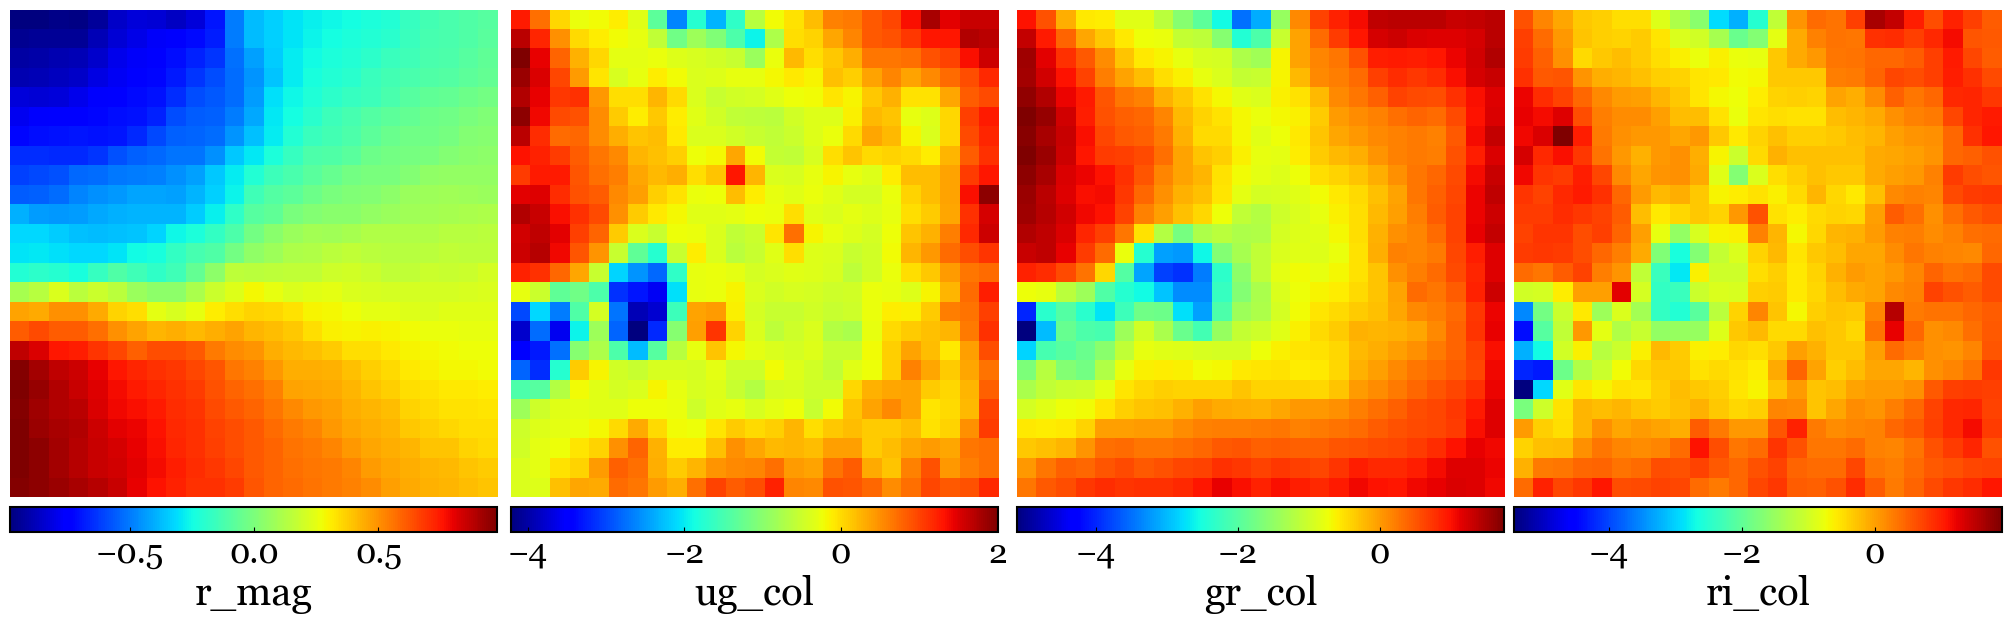

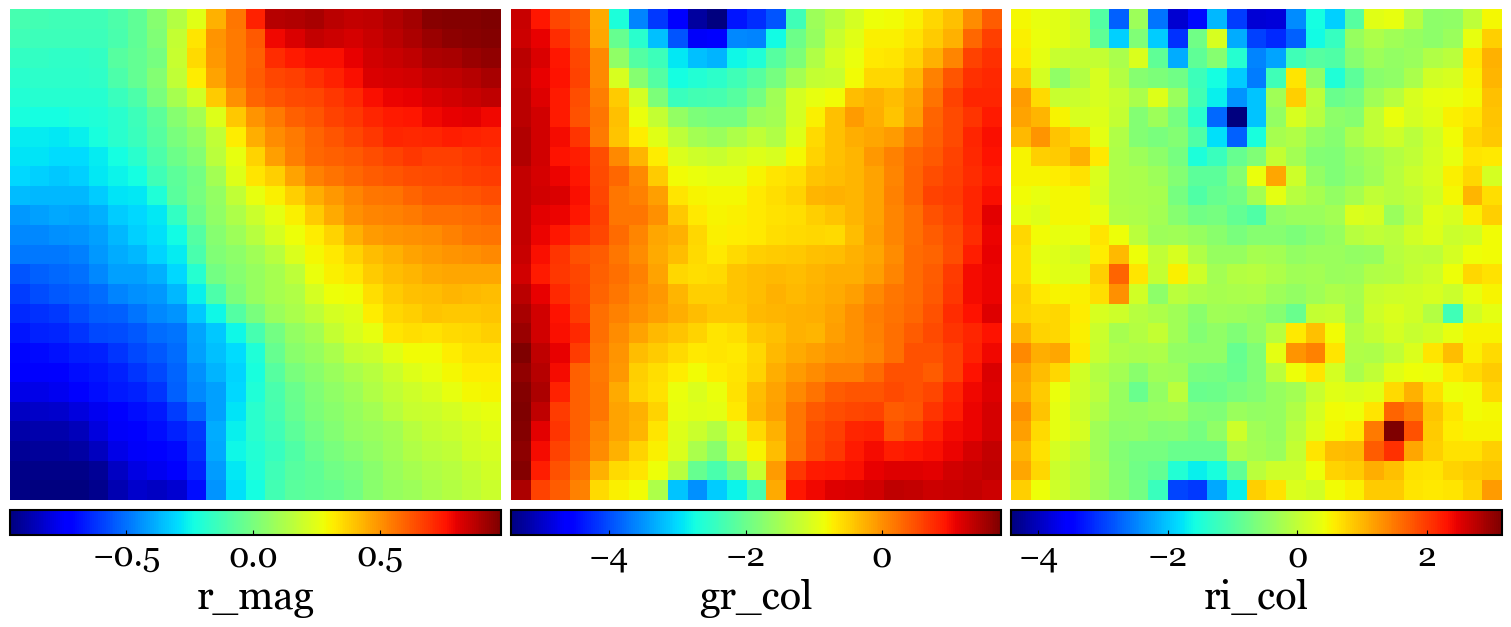

In [13]:
#Visualize the SOM after training
SOM_u.show_map(cmap = 'jet')

SOM_no_u.show_map(cmap = 'jet')


| SOM. Step 20. Initialization: pca

| SOM. Step 20. Initialization: pca


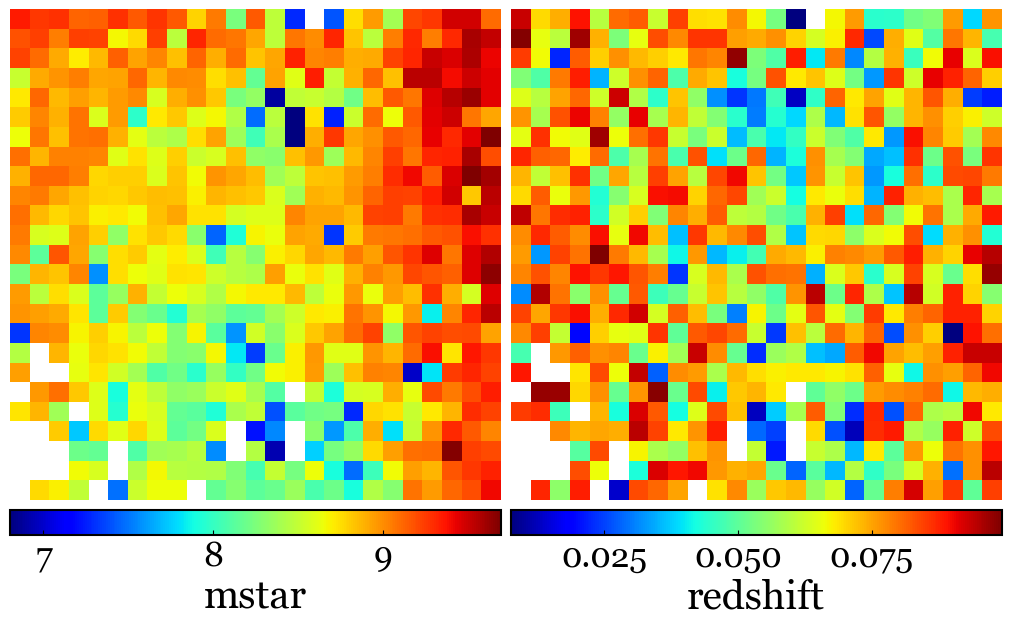

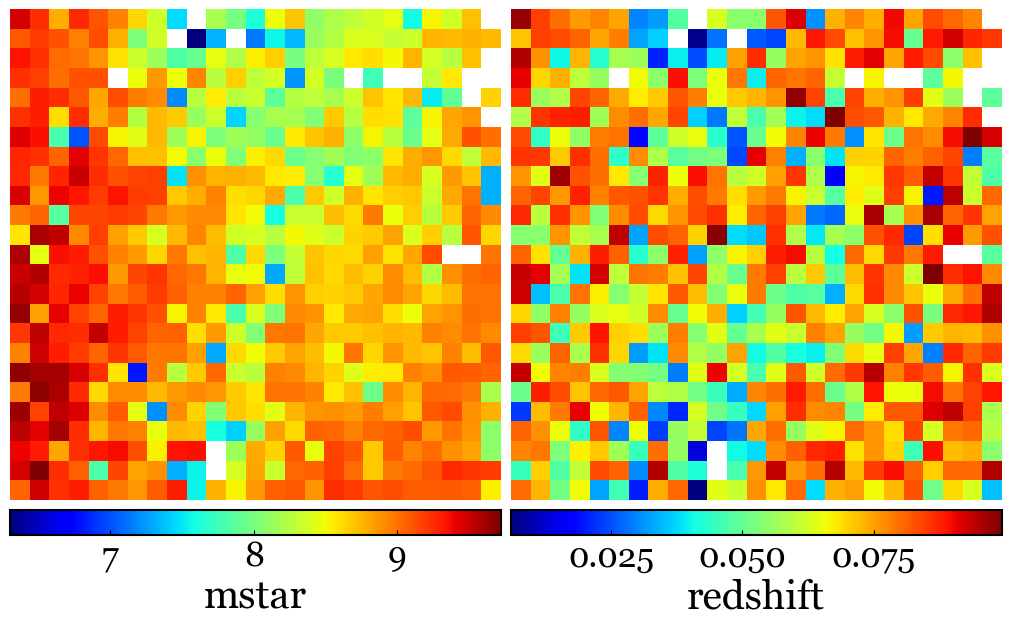

In [10]:
#Label the cells in the map with external parameters. Visualize the labeled map.
SOM_u.load_labeling_data(input_labels_u,
                       parameter_names = ['mstar', 'redshift'])

SOM_u.load_labeling_standard_deviations(input_label_stds_u)

SOM_u.label_map()

SOM_u.show_map(show_labeled = True, log_norm = [],
             cmap = 'jet')

SOM_no_u.load_labeling_data(input_labels_no_u,
                       parameter_names = ['mstar', 'redshift'])

SOM_no_u.load_labeling_standard_deviations(input_label_stds_no_u)

SOM_no_u.label_map()

SOM_no_u.show_map(show_labeled = True, log_norm = [],
             cmap = 'jet')

In [11]:
SOM_u.predict(SOM_u.labeling_data[:, :SOM_u.data_dim],
            np.sqrt(SOM_u.label_variances[:, :SOM_u.data_dim]))

SOM_no_u.predict(SOM_no_u.labeling_data[:, :SOM_no_u.data_dim],
       np.sqrt(SOM_no_u.label_variances[:, :SOM_no_u.data_dim]))

In [12]:
mstar_pred_u = SOM_u.prediction_results[:, 0]
redshift_pred_u = SOM_u.prediction_results[:, 1]

mstar_pred_no_u = SOM_no_u.prediction_results[:, 0]
redshift_pred_no_u = SOM_no_u.prediction_results[:, 1]

In [56]:
np.sum(~np.isnan(mstar_pred_no_u))

15467

<>:26: SyntaxWarning: invalid escape sequence '\o'
<>:26: SyntaxWarning: invalid escape sequence '\o'
/var/tmp/lsajkov/ipykernel_2770439/1932907408.py:26: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('log($M_*/M_{\odot}$)')


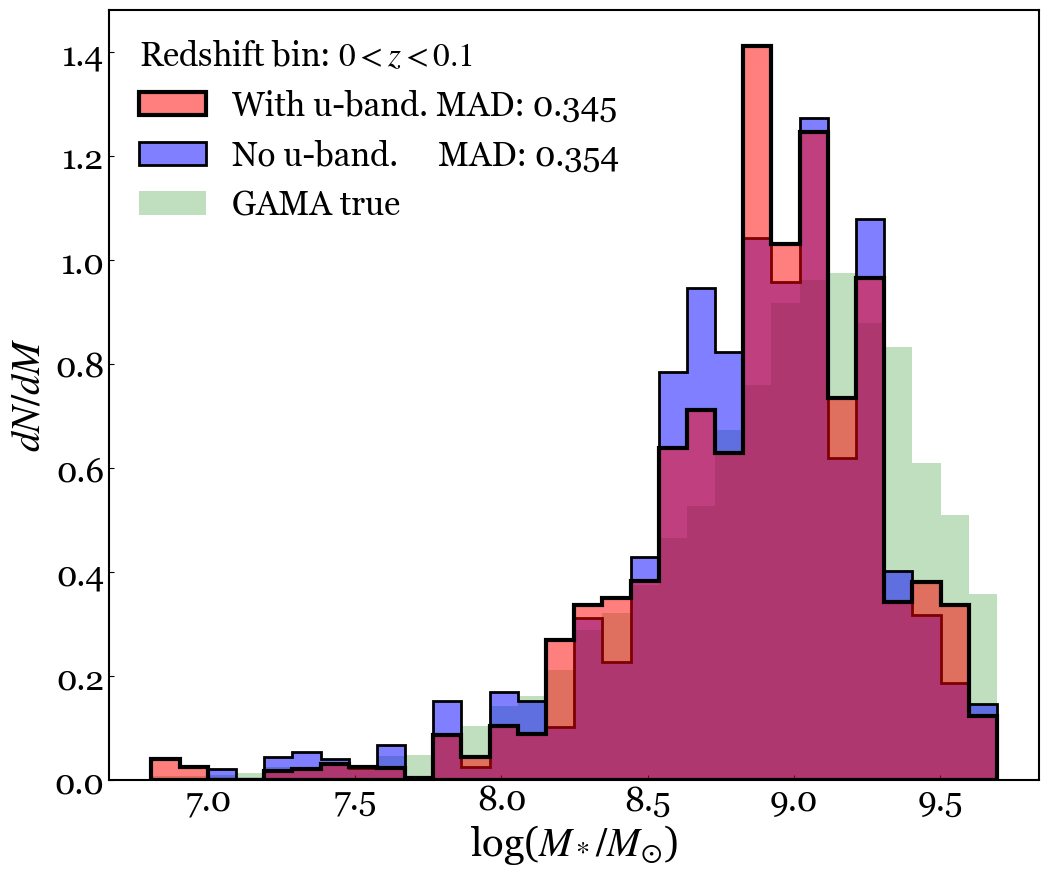

In [22]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

MAD_u = np.nansum(np.abs(SOM_u.labeling_data[:, SOM_u.data_dim] - mstar_pred_u))/\
         np.sum(~np.isnan(mstar_pred_u))       

MAD_no_u = np.nansum(np.abs(SOM_no_u.labeling_data[:, SOM_no_u.data_dim] - mstar_pred_no_u))/\
            np.sum(~np.isnan(mstar_pred_no_u))  

bins = ax.hist(mstar_pred_u, bins = 30, density = True,
        histtype = 'stepfilled', edgecolor = 'black', linewidth = 3,
        facecolor = ('red', 0.5),
        label = f'With u-band. MAD: {MAD_u:.3f}', zorder = 99)[1]

ax.hist(mstar_pred_no_u, bins = bins, density = True,
        histtype = 'stepfilled', edgecolor = 'black', linewidth = 2,
        facecolor = ('blue', 0.5),
        label = f'No u-band.     MAD: {MAD_no_u:.3f}')

ax.hist(SOM_u.labeling_data[:, SOM_u.data_dim],
        bins = bins, density = True, zorder = 0,
        facecolor = ('green', 0.25),
        label = 'GAMA true')


ax.set_xlabel('log($M_*/M_{\odot}$)')
ax.set_ylabel('$dN/dM$')

ax.legend(frameon = False,
          title = 'Redshift bin: $0<z<0.1$',
          alignment = 'left')

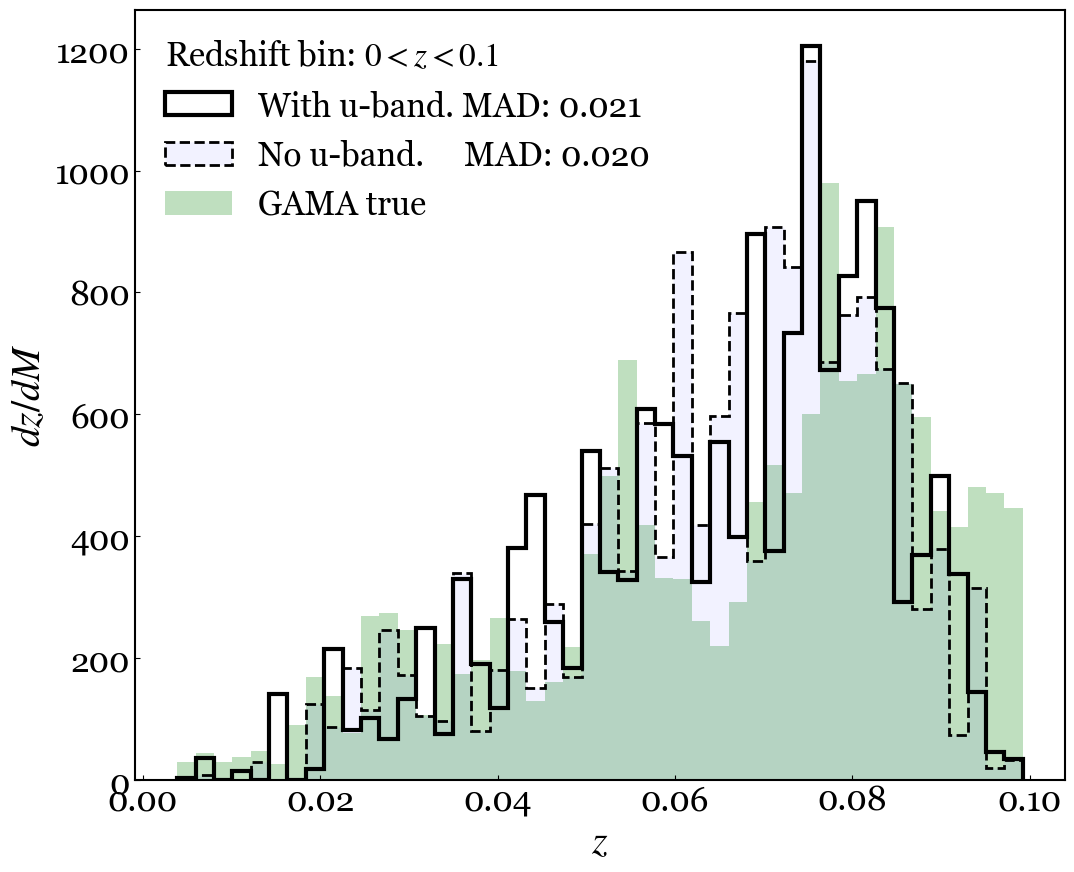

In [76]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

MAD_u = np.nansum(np.abs(SOM_u.labeling_data[:, SOM_u.data_dim + 1] - redshift_pred_u))/\
         np.sum(~np.isnan(redshift_pred_u))       

MAD_no_u = np.nansum(np.abs(SOM_no_u.labeling_data[:, SOM_no_u.data_dim + 1] - redshift_pred_no_u))/\
            np.sum(~np.isnan(redshift_pred_no_u))  

bins = ax.hist(redshift_pred_u, bins = 'auto',
        histtype = 'step', edgecolor = 'black', linewidth = 3,
        label = f'With u-band. MAD: {MAD_u:.3f}', zorder = 99)[1]

ax.hist(redshift_pred_no_u, bins = bins,
        histtype = 'stepfilled', edgecolor = 'black', linestyle = '--', linewidth = 2,
        facecolor = ('blue', 0.1),
        label = f'No u-band.     MAD: {MAD_no_u:.3f}')

ax.hist(SOM_u.labeling_data[:, SOM_u.data_dim + 1],
        bins = bins, zorder = 0,
        facecolor = ('green', 0.25),
        label = 'GAMA true')


ax.set_xlabel('$z$')
ax.set_ylabel('$dz/dM$')

ax.legend(frameon = False,
          title = 'Redshift bin: $0<z<0.1$',
          alignment = 'left')

In [72]:
ax.hist(redshift_pred_no_u)

(array([  36.,  402.,  723.,  863., 1469., 2230., 2649., 3929., 2529.,
         637.]),
 array([0.00601017, 0.0153495 , 0.02468884, 0.03402818, 0.04336752,
        0.05270685, 0.06204619, 0.07138553, 0.08072486, 0.0900642 ,
        0.09940354]),
 <BarContainer object of 10 artists>)